In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()

In [4]:
Xtr.shape

(60000, 28, 28)

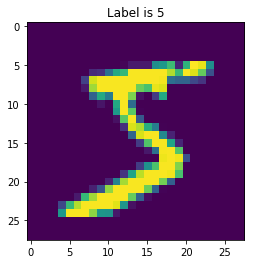

In [5]:
Image=Xtr[0,:,:]
Label=Ltr[0]


plt.title('Label is {Label}'.format(Label=Label))
plt.imshow(Image)

plt.show()
plt.close()


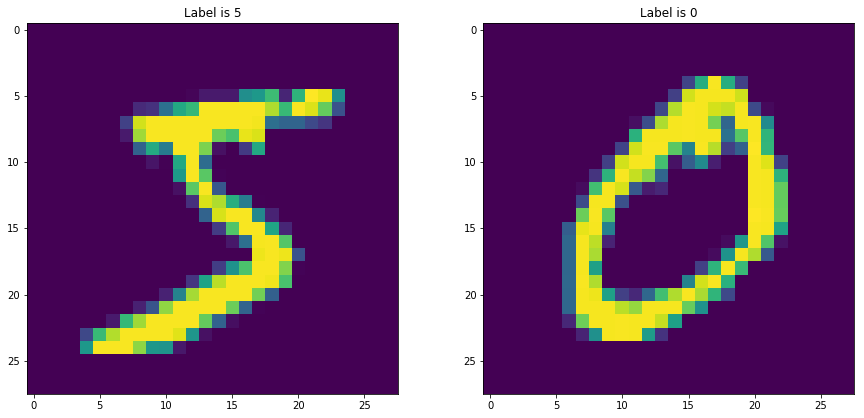

In [6]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax0=plt.subplot(2,2,1)
ax1=plt.subplot(2,2,2)

Image=Xtr[0,:,:]
Label=Ltr[0]
Image1=Xtr[1,:,:]
Label1=Ltr[1]


ax0.set_title('Label is {Label}'.format(Label=Label))
ax0.imshow(Image)
ax1.set_title('Label is {Label}'.format(Label=Label1))
ax1.imshow(Image1)


plt.show()
plt.close()


In [7]:
28*28

784

In [38]:
#Traing phase
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]
print(type(Xtr[0, 0,0,]))


Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype(int)
print(type(Tr_set[0, 0]))
#Tr_set = Tr_set/255
#print(Xtr[0])
#print(Tr_set[0])
Tr_set.shape

<class 'numpy.uint8'>
<class 'numpy.int32'>


(500, 784)

In [39]:
def predict(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        #distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)
        distances=np.sqrt(np.sum(np.square(Tr_set-X[i,:]),axis=1))
        if i == 0:
            print(distances)
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [40]:
print(X_test.shape)
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
#Test_images = Test_images/255
Labels_predicted=predict(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))



(10000, 28, 28)
[2395.79569246 2650.6303024  2407.30824782 2556.60966907 2345.20915912
 2468.43249857 2377.46503655 2644.56555978 2167.94833887 2265.93203782
 2463.6278128  2395.98873119 2943.12470004 2669.16260277 2189.33323183
 2002.41504189 2277.27929776 2484.59010704 2312.75052697 2101.4851891
 2930.34793156 2803.14519781 2169.13692514 2524.00653723 2446.89068003
 2990.74555922 1998.38810044 2828.32423884 2454.5190975  2237.56854644
 2372.76378934 2782.32007505 2358.54764633 2082.92150596 2506.24958853
 2318.00301984 2815.00426287 2653.49166194 2098.48302352 2393.23045276
 2137.12680953 2488.048432   1862.9747717  2121.91045994 2195.03439609
 1880.70731375 2367.05386504 2472.284571   2255.44275033 2644.90945025
 2419.52288685 3054.28404049 1764.10430531 2382.25313516 1835.25638536
 2444.14790878 3024.6665932  1917.97367031 2786.40969708 2548.70908501
 2767.95628578 2486.94229929 2807.20572812 3128.39399693 2628.1590515
 2539.40957705 2722.19194768 2308.55062756 2731.27516007 2820.3

In [28]:
#print(Ltr[0])
#print(Xtr[0, :])
#print(L_test[0])
#print(X_test[0, :])
#np.sqrt(np.sum(np.sum(np.square(Xtr[0, :]-X_test[0,:]),axis=1)))
np.sqrt(np.sum(np.sum(np.square((Xtr[0, :]/255)-(X_test[0,:]/255)))))

9.395277225325238